In [2]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [3]:
X_validation = pd.read_csv("Data\X_validation.csv")
y_validation = pd.read_csv("Data\y_validation.csv")

X_test = pd.read_csv("Data\X_test.csv")
y_test = pd.read_csv("Data\y_test.csv")

In [4]:
models = dict()

for m in ["LR", "SVM", "MLP", "RF", "GB"]:
    models[m] = joblib.load(f"Models\\{m}_model.pkl".format(m))

In [4]:
print(models)

{'LR': LogisticRegression(C=1), 'SVM': SVC(C=10, gamma=0.001, kernel='poly'), 'MLP': MLPClassifier(learning_rate='invscaling'), 'RF': RandomForestClassifier(max_depth=16, n_estimators=50), 'GB': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=500)}


In [5]:
#evaluate accuracy, precision, and recall

def evaluate_model (name, model, features, labels): 
    start = time()
    pred = model.predict(features)
    end = time()
    totalTime = round((end - start) * 1000, 3)
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print(f"{name}\t Accuracy: {accuracy} / Precision: {precision} / Recall: {recall} / Latency: {totalTime}ms")

In [6]:
for name, model in models.items():
    evaluate_model(name, model, X_validation, y_validation)

LR	 Accuracy: 0.855 / Precision: 0.889 / Recall: 0.941 / Latency: 4.684ms
SVM	 Accuracy: 0.855 / Precision: 0.889 / Recall: 0.941 / Latency: 6.278ms
MLP	 Accuracy: 0.823 / Precision: 0.823 / Recall: 1.0 / Latency: 29.177ms
RF	 Accuracy: 0.839 / Precision: 0.86 / Recall: 0.961 / Latency: 23.609ms
GB	 Accuracy: 0.806 / Precision: 0.842 / Recall: 0.941 / Latency: 4.935ms


### Evaluate best model on test dataset

In [7]:
evaluate_model("LR", models["LR"], X_test, y_test)

LR	 Accuracy: 0.935 / Precision: 0.966 / Recall: 0.966 / Latency: 2.997ms


In [9]:
models["LR"].score(X_test, y_test)

0.9354838709677419

### Evaluate the other models for funsies

In [13]:
for name, model in models.items():
    if name != "LR":
        evaluate_model(name, model, X_test, y_test)

SVM	 Accuracy: 0.935 / Precision: 0.966 / Recall: 0.966 / Latency: 1.999ms
MLP	 Accuracy: 0.935 / Precision: 0.935 / Recall: 1.0 / Latency: 1.997ms
RF	 Accuracy: 0.935 / Precision: 0.982 / Recall: 0.948 / Latency: 6.998ms
GB	 Accuracy: 0.935 / Precision: 0.966 / Recall: 0.966 / Latency: 1.0ms


### ROC AUC for only LR for now

In [32]:
y_pred = models["LR"].predict(X_test)
print(y_pred)

y_pred_prob = models["LR"].predict_proba(X_test)[:,1]
print(y_pred_prob)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[0.9920916  0.92350277 0.78826014 0.90110472 0.96675537 0.94304893
 0.9466963  0.98793796 0.93861705 0.6600096  0.99933242 0.97577831
 0.99355428 0.98945285 0.93637658 0.19690633 0.99536149 0.96168434
 0.85458263 0.86648806 0.94778155 0.88339294 0.95452061 0.8987029
 0.99759643 0.96569125 0.99379911 0.76222061 0.99692174 0.99579178
 0.30938634 0.86210246 0.87042643 0.94746939 0.97497226 0.9707947
 0.95567624 0.97939467 0.11339678 0.99682175 0.99299675 0.96571263
 0.99687643 0.98432472 0.94472709 0.64657268 0.92150659 0.86068571
 0.99797146 0.89748354 0.99862039 0.90920349 0.99345705 0.98085108
 0.97862634 0.99133959 0.97031621 0.98936314 0.97939467 0.11127442
 0.99495632 0.98519585]


In [29]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

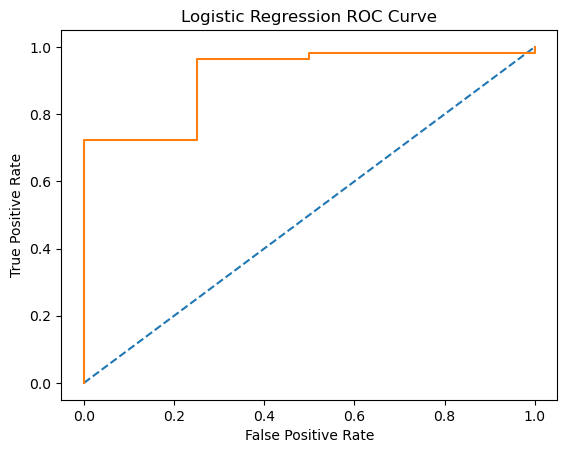

In [30]:
plt.plot([0,1], [0,1], "--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score

print("ROC AUC: ", roc_auc_score(y_test, y_pred_prob))

ROC AUC:  0.9137931034482758


### Confusion Matrix

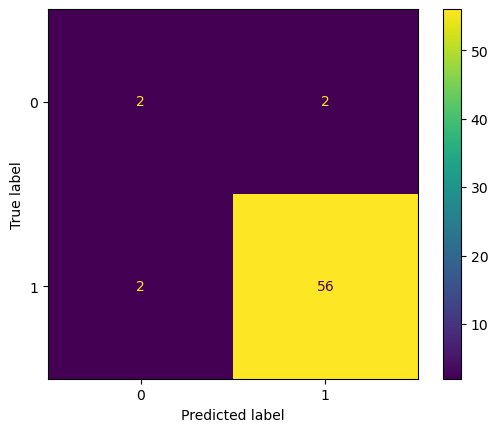

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = models["LR"].classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels = models["LR"].classes_)
cm_display.plot()
plt.show()